In [57]:
#import libraries
import numpy as np
import pandas as pd

In [58]:
#load data (change filepaths if necessary)
train_images = np.load('winter2020-mais-202/train_images.npy')
test_images = np.load('winter2020-mais-202/test_images.npy')

train_labels = np.loadtxt('winter2020-mais-202/train_labels.csv', delimiter=',', skiprows=1)[:, 1]

In [7]:
import matplotlib.pyplot as plt

def show_image(arr):
    plt.figure()
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

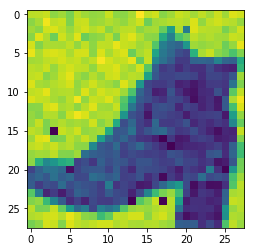

In [10]:
show_image(train_images[200]) # 0 is the index of the training image you want to display

## CNN

In [75]:
#import modules
from keras.utils import to_categorical #to encode the labels
from keras.models import Sequential #we use the sequential model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout #model layers

In [44]:
#reshaping data
x_train = train_images.reshape(50000,28,28,1)
x_test = test_images.reshape(20000,28,28,1)

In [45]:
#we need to encode the labels to train our model
y_train = to_categorical(train_labels)

In [77]:
#create the sequential model
model = Sequential()

In [61]:
#add layers to the model
model.add(Conv2D(64, kernel_size=3, activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [78]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [79]:
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
#train the model
model.fit(x_train, y_train, validation_split=0.25, epochs=3)

ValueError: Error when checking target: expected dense_6 to have shape (1,) but got array with shape (10,)

In [ ]:
x_test = np.load('test_images.npy').squeeze()
x_test = x_test.reshape(len(x_test), -1)
y_test = model.predict(x_test)

df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test
df_test.to_csv('submission.csv', index=False)

Source: https://keras.io/